# 2장 데이터 적재
- 머신러닝의 첫번째 단계 : 시스템으로 원본 데이터를 불러오기
- 데이터 소스는 매우 다양해서 추출부터 해야할수도 있다.

## 2.1 샘플 데이터셋 적재
- 과제 : *이미 준비되어 있는 데이터셋*을 사용하기
- 토이(toy) 데이터셋 : 라이브러리에 내장되어있으면서 실전에서 만나는 것보다 아주 작고 정제되어 있는 데이터셋
- 파이썬 대표 라이브러리와 내장 샘플 데이터셋

|라이브러리 | 내장 샘플 데이터 | 코드 예시|
|-|-|-|
|sklearn| 내장 데이터 목록(https://scikit-learn.org/stable/datasets.html ) | from skrean import datasets |
|tf.keras| boston housing, cifar100, fashion_mnist, imbd, mnist 등 (https://www.tensorflow.org/api_docs/python/tf/keras/datasets)| tf.keras.datasets.mnist.load_data()|
|Pytorch| CIFAR, FashionMNIST, Food101 등 (https://pytorch.org/vision/main/datasets.html) | torchvision.datasets.MNIST()  |
|matplotlib|내장 데이터 목록(https://github.com/matplotlib/matplotlib/tree/v3.7.2/lib/matplotlib/mpl-data/sample_data) | matplotlib.cbook.get_sample_data 검색|
|seaborn |내장 데이터 목록(https://github.com/mwaskom/seaborn-data) |seaborn.load_dataset(파일이름) https://seaborn.pydata.org/generated/seaborn.load_dataset.html?highlight=dataset#seaborn.load_dataset |

In [1]:
# 사이킷런의 데이터셋을 적재합니다.
from sklearn import datasets

# 숫자 데이터셋을 적재합니다.
digits = datasets.load_digits()

# 특성 행렬을 만듭니다.
features = digits.data

# 타깃 벡터를 만듭니다.
target = digits.target

# 첫 번째 샘플을 확인합니다.
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### 붙임

In [2]:
#딕셔너리 형태로 저장되어 있습니다.
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [23]:
# DESCR 키는 데이터셋에 대한 설명을 담고 있습니다.
digits['DESCR']
#digits['DESCR'][:70]

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [4]:
import numpy as np

# 0에서부터 4까지 다섯 개의 숫자만 적재합니다.
X, y = datasets.load_digits(n_class=5, return_X_y=True) 
# return_X_y=True : 위 예시처럼 딕셔너리 형태로 불러오는 것이 아닌 X, y의 값만 반환

# 배열에 있는 고유한 값을 반환합니다.
np.unique(y)

array([0, 1, 2, 3, 4])

* load_digits 데이터 전체 확인해보기

In [34]:
print(X.shape, X[:2])
print(y.shape, y[:5])

(901, 64) [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]
(901,) [0 1 2 3 4]


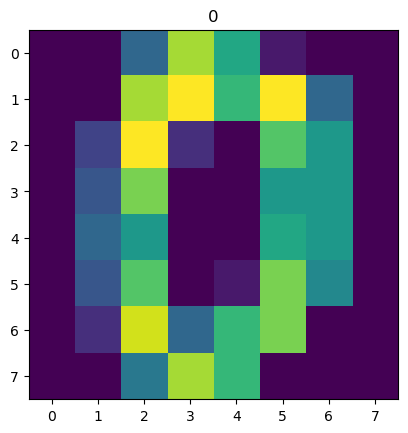

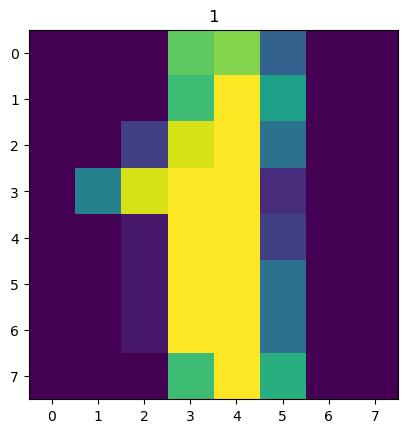

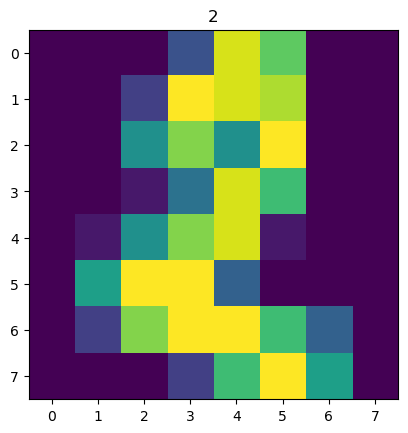

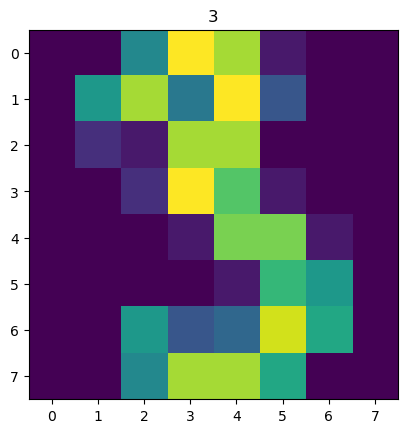

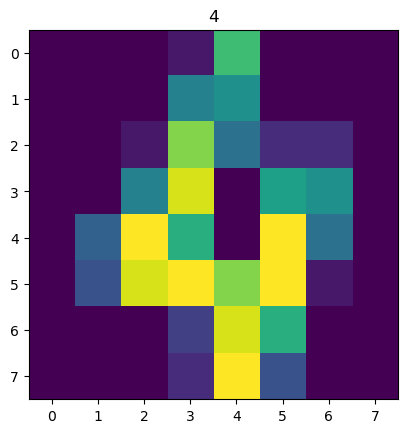

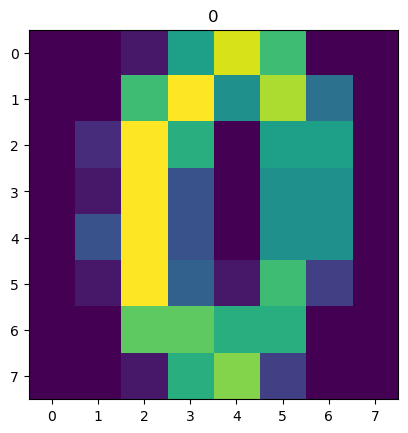

In [32]:
#load_digits 데이터 전체 확인해보기
import matplotlib.pyplot as plt

for i in range(6):
  plt.imshow(X[i, :].reshape(8, 8))
  plt.title(y[i])
  plt.show();

## 2.2 모의 데이터셋 만들기
- sklearn에서 모델에 맞는 모의 데이터셋 만들 수 있다.
    - make_regression : (비)선형 모델에 맞는 데이터 생성
    - make_classification  : 분류 모델에 맞는 데이터 생성
    - make_blobs : 클러스터가 있는 원형 데이터 생성
    - make_circles : 동심원 데이터 생성 , ◎ 모양
    - make_moons : 달모양 데이터 생성,  ) ( 모양
    - make_s_curve : S 모형 모델 생성

##### 회귀 데이터

In [38]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import make_regression

# 특성 행렬, 타깃 벡터, 정답 계수를 생성합니다.
features, target, coefficients = make_regression(n_samples = 100, #생성할 데이터 개수
                                                 n_features = 3, #변수 개수
                                                 n_informative = 3, # 타깃 생성에 사용할 핵심 변수 개수
                                                 n_targets = 1, # y 개수
                                                 noise = 0.0, #노이즈 크기
                                                 coef = True, #계수 반환 여부
                                                 random_state = 1)

# 특성 행렬과 타깃 벡터를 확인합니다.
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
타깃 벡터
 [-10.37865986  25.5124503   19.67705609]


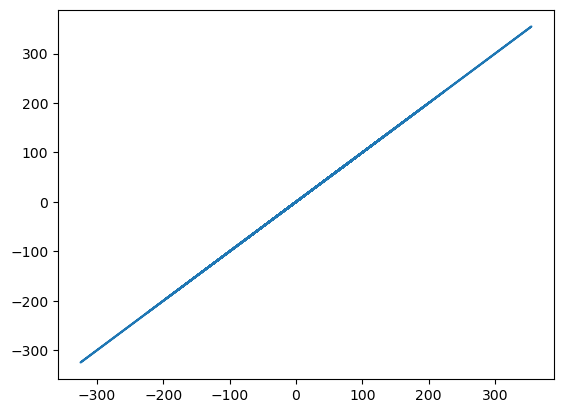

In [49]:
import matplotlib.pyplot as plt

plt.plot(features@coefficients, target)
plt.show()

##### 분류 데이터

In [50]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 생성합니다.
features, target = make_classification(n_samples = 100, #생성할 데이터 개수
                                       n_features = 3, #변수 개수
                                       n_informative = 3, # 타깃 생성에 사용할 핵심 변수 개수
                                       n_redundant = 0, # 공변량 성격 가지는 변수의 개수?
                                       n_classes = 2, #y 개수
                                       weights = [.25, .75], #클래스 별 가중치 개수
                                       random_state = 1)

# 특성 행렬과 타깃 벡터를 확인합니다.
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
타깃 벡터
 [1 0 0]


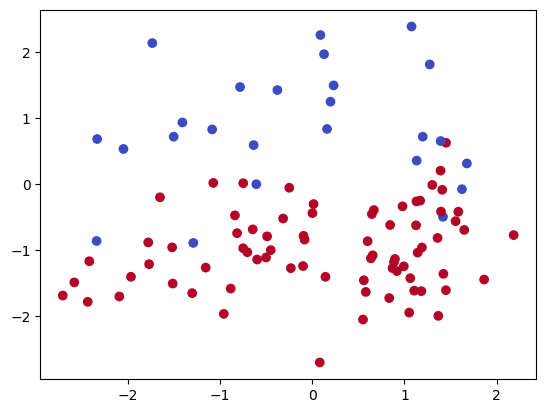

In [53]:
import matplotlib.pyplot as plt
plt.scatter(features[:,0], features[:,1], c=target, cmap="coolwarm")
plt.show()

##### 클러스터 데이터

In [54]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import make_blobs

# 특성 행렬과 타깃 벡터를 생성합니다.
features, target = make_blobs(n_samples = 100, #생성할 데이터 개수
                              n_features = 2, #변수 개수
                              centers = 3, #클러스터 개수
                              cluster_std = 0.5, #클러스터 표준편차
                              shuffle = True,
                              random_state = 1)

# 특성 행렬과 타깃 벡터를 확인합니다.
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
타깃 벡터
 [0 1 1]


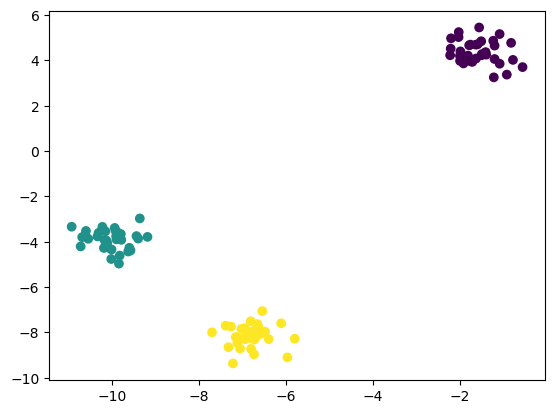

In [55]:
import matplotlib.pyplot as plt
# 산점도를 출력합니다.
plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

## 2.3 CSV 파일 적재
- 팁
    1. 적재하기 전에 파일의 내용 잠깐 확인하기 : 데이터셋 구성, 매개변수 설정 이해에 도움이 됨
    2. read_csv는 매개변수가 30개 이상
        - sep = "\t" : tsv 불러올 수 있다
        - header : 제목 행이 몇번쨰 줄인지 지정할 수 있다 (없으면 header=None)
        - skiprows : 건너 뛸 행의 개수나 범위를 지정할 수 있다.
        - nrows : 읽을 행의 개수를 지정할 수 있다.
    

In [41]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://tinyurl.com/simulated-data'

# 데이터 적재
dataframe = pd.read_csv(url)

# 처음 다섯 행을 확인합니다.
dataframe.head()
#dataframe.head(2)  # 행 두개만 확인 

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


### 붙임

In [11]:
# 1~10번째 행을 건너 뛰고 한 행을 읽습니다.
dataframe = pd.read_csv(url, skiprows=range(1, 11), nrows=1)
dataframe

,integer,datetime,category
0,5,2015-01-01 00:00:10,0


## 2.4 엑셀 파일 적재
- 현재는 read_excel()함수가 내장되어 바로 사용이 가능하지만 원래는 xlrd 패키지를 설치해야 했다.
- 매개변수를 잘 활용하는 것이 필요하다


In [12]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://tinyurl.com/simulated-excel'

# 데이터 적재
dataframe = pd.read_excel(url, sheet_name=0, header=1)

# 처음 두 행을 확인합니다.
dataframe.head(2)

,5,2015-01-01 00:00:00,0
0,5,2015-01-01 00:00:01,0
1,9,2015-01-01 00:00:02,0


## 2.5 JSON 파일 적재하기
- JSON (JavaScript Object Notation) 
    - 데이터를 저장, 교환하기 위한 텍스트 기반의 표준 포맷
    
- 핵심 매개변수 : orient
    - JSON 파일이 어떻게 구성되었는지 지정할 수 있다.
    
    | 키워드 | 구조 예시 |
    |-|-|
    |'split'|{"index":[인덱스, ...], "columns":[열,...], "data":[값,...]}|
    |'records'| [{key1 : value1}...]|
    |'index'|{인댁스:{key: value, ...}, ...}|
    |'values'|[values, ...]|
    

In [44]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://tinyurl.com/simulated-json'

# 데이터 적재
dataframe = pd.read_json(url, orient='columns')

# 처음 두 행을 확인합니다.
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


## 2.6 SQL 데이터베이스로부터 적재
- SQL(Structured Query Language) : DB에서 데이터를 끌어오는 표준 언어
- sqlite3, sqlalchemy

In [56]:
# 코랩에서 실행하는 경우 다음 주석을 제거하고 실행하세요.
#!wget https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/sample.db -O sample.db

In [68]:
# 감사합니다 스터디장님 ^^...
# https://pythonhosted.org/underverse/
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

Base = declarative_base()

class Data(Base):
    __tablename__ = 'data'
    id = Column(Integer, primary_key=True)
    name = Column(String)
    age = Column(Integer)

engine = create_engine('sqlite:///sample.db')
Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()

# 샘플 데이터 삽입
sample_data = [
    Data(name='Alice', age=25),
    Data(name='Bob', age=30),
    Data(name='Charlie', age=28),
]

session.add_all(sample_data)
session.commit()

In [69]:
dc = create_engine('sqlite:///sample.db')
df = pd.read_sql_query('SELECT * FROM data', dc)
df

,id,name,age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,28


## 2.+ 다른 확장자 파일

* 참고 : 공공데이터포털( https://www.data.go.kr/index.do )
* 검색 제공 확장자 목록

| 모달리티 | 확장자 목록| 주요 관련 라이브러리|
|-|-|-|
|정형데이터|CSV, XLS, XLSX| pandas | 
|웹| XML, HTML, JSON, TTL , RDF, ROD| pandas , xml, rdflib |
|이미지| JPG, JPEG, GIF , PNG, TIF,  TIFF | pillow, OpenCV |
|오디오|MP3, WAV| 파이토치, 케라스, Pydub, LibROSA|
|비디오| MP4, STL| OpenCV, 파이토치, 텐서플로우, scikit-image, ffmpeg |
|자연어|TXT, HWP, HWPX, DOC, DOCX  ||
|지도| SHP , GPS, GEOJSON| Shapely , GeoPandas , Fiona  등|
|프로그래밍언어파일| SGML, DTD| xml.etree.ElementTree|
|기타| FASTA, PDF, ODT, PPT, PPTX| | PyMuPDF 등|

* 판다스 적재 함수 : https://pandas.pydata.org/docs/reference/io.html
